### import the neccessary libries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Apply morphological operations to clean up shadow detection (e.g., closing small holes and removing noise).

In [2]:
# Function to apply morphological transformations to improve shadow detection
def improve_shadow_detection(shadow_mask):
    kernel = np.ones((5, 5), np.uint8)
    # Perform closing (dilation followed by erosion) to fill small holes in the shadow mask
    cleaned_shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
    return cleaned_shadow_mask

### Segment the image into different regions using k-means clustering.Helps differentiate between buildings, open spaces, trees, etc.

In [3]:
# Function to segment different areas using k-means clustering
def segment_image(image, k=3):
    
    # Convert the image to a 2D array of pixel values
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Define criteria, number of clusters(K) and apply k-means()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert centers to 8-bit values
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image, labels.reshape((image.shape[0], image.shape[1]))


### Analyze the satellite image to identify potential areas for solar panels using image processing techniques like segmentation, brightness analysis, and shadow detection.

In [4]:

# Function to analyze the image for solar panel placement
def analyze_solar_potential(image_path):
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale for brightness and shadow analysis
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Segmentation: Segment the image into k regions (e.g., buildings, trees, open spaces)
    segmented_image, labels = segment_image(image, k=3)
    
    # Brightness Analysis: Estimate sunlight exposure by computing the average brightness
    avg_brightness = np.mean(gray_image)
    
    # Shadow Detection: Thresholding to detect shadow areas (dark areas)
    _, shadow_mask = cv2.threshold(gray_image, 60, 255, cv2.THRESH_BINARY_INV)
    
    # Improve shadow detection with morphological operations
    cleaned_shadow_mask = improve_shadow_detection(shadow_mask)
    
    # Edge Detection: Use edge detection to find structures like buildings or trees
    edges = cv2.Canny(gray_image, 100, 200)
    
    # Score Calculation: Combine brightness, shadow, and edge information into a scoring system
    # Regions with higher brightness and fewer shadows are scored higher for solar potential
    bright_area_mask = cv2.inRange(gray_image, 200, 255)  # Areas with high brightness
    solar_potential_score = np.mean(bright_area_mask) - np.mean(cleaned_shadow_mask)
    
    # Display the original, segmented, and shadow-detected images
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    plt.subplot(2, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    
    plt.subplot(2, 2, 3)
    plt.title("Cleaned Shadow Detection")
    plt.imshow(cleaned_shadow_mask, cmap='gray')
    
    plt.subplot(2, 2, 4)
    plt.title("Edge Detection (Structures)")
    plt.imshow(edges, cmap='gray')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Average Brightness (Sunlight Exposure Estimation): {avg_brightness}")
    print(f"Solar Potential Score (Higher is Better): {solar_potential_score}")

### Check the possibility of solar planting with prefer images
* Higher solar potential is better

In [5]:
# Example usage with a local image file
image_path = 'Screenshot 2024-09-03 at 19.15.08.png' 

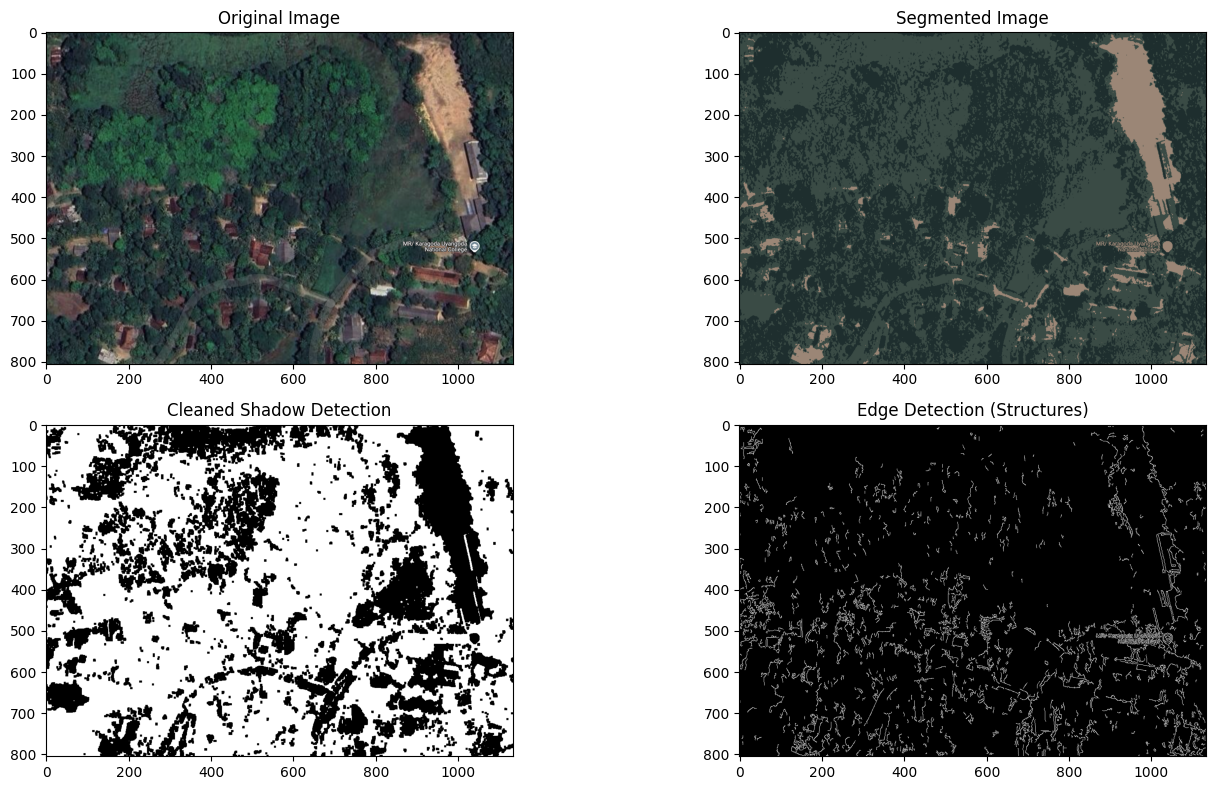

Average Brightness (Sunlight Exposure Estimation): 61.65816361772461
Solar Potential Score (Higher is Better): -169.305696414181


In [6]:
# Analyze the solar potential of the image
analyze_solar_potential(image_path)

In [7]:
# Example usage with a local image file
image_path = 'Screenshot 2024-09-03 at 19.16.44.png' 

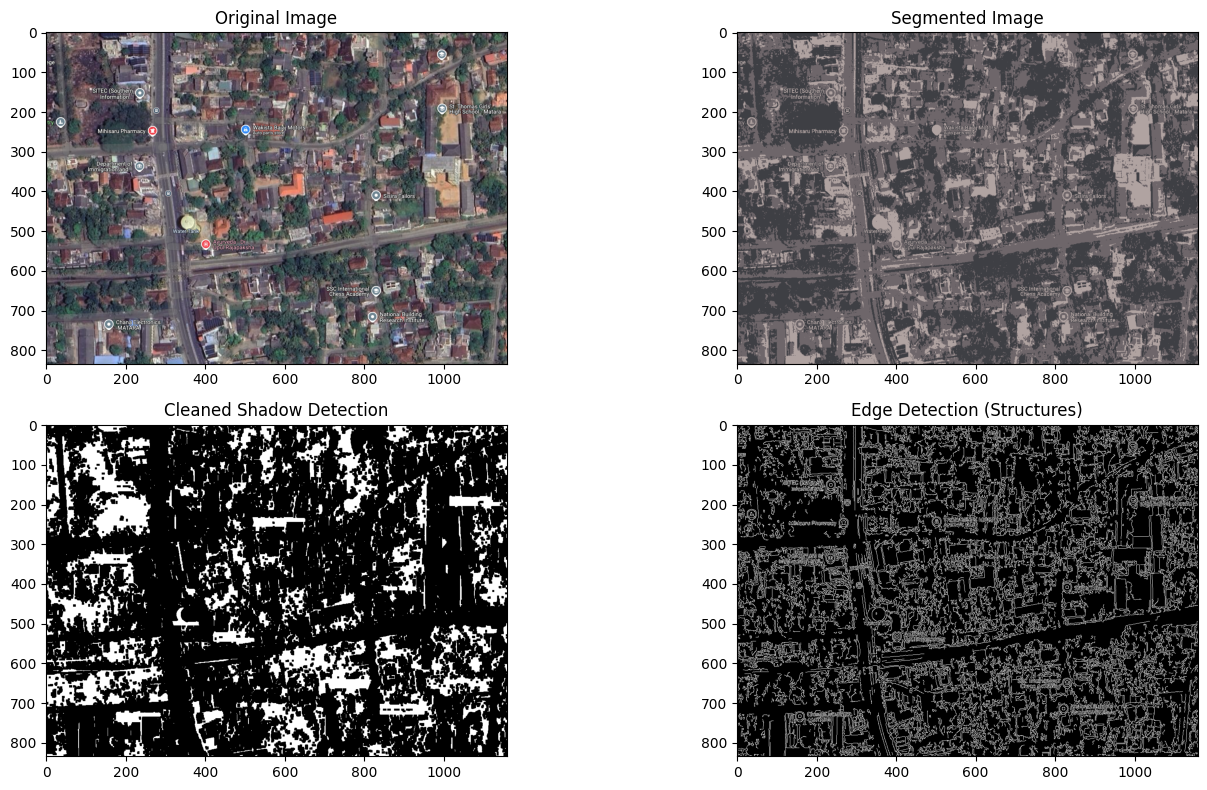

Average Brightness (Sunlight Exposure Estimation): 97.62533027934856
Solar Potential Score (Higher is Better): -51.66158186479289


In [8]:
# Analyze the solar potential of the image
analyze_solar_potential(image_path)

In [9]:
# Example usage with a local image file
image_path = 'Screenshot 2024-09-03 at 19.17.29.png' 

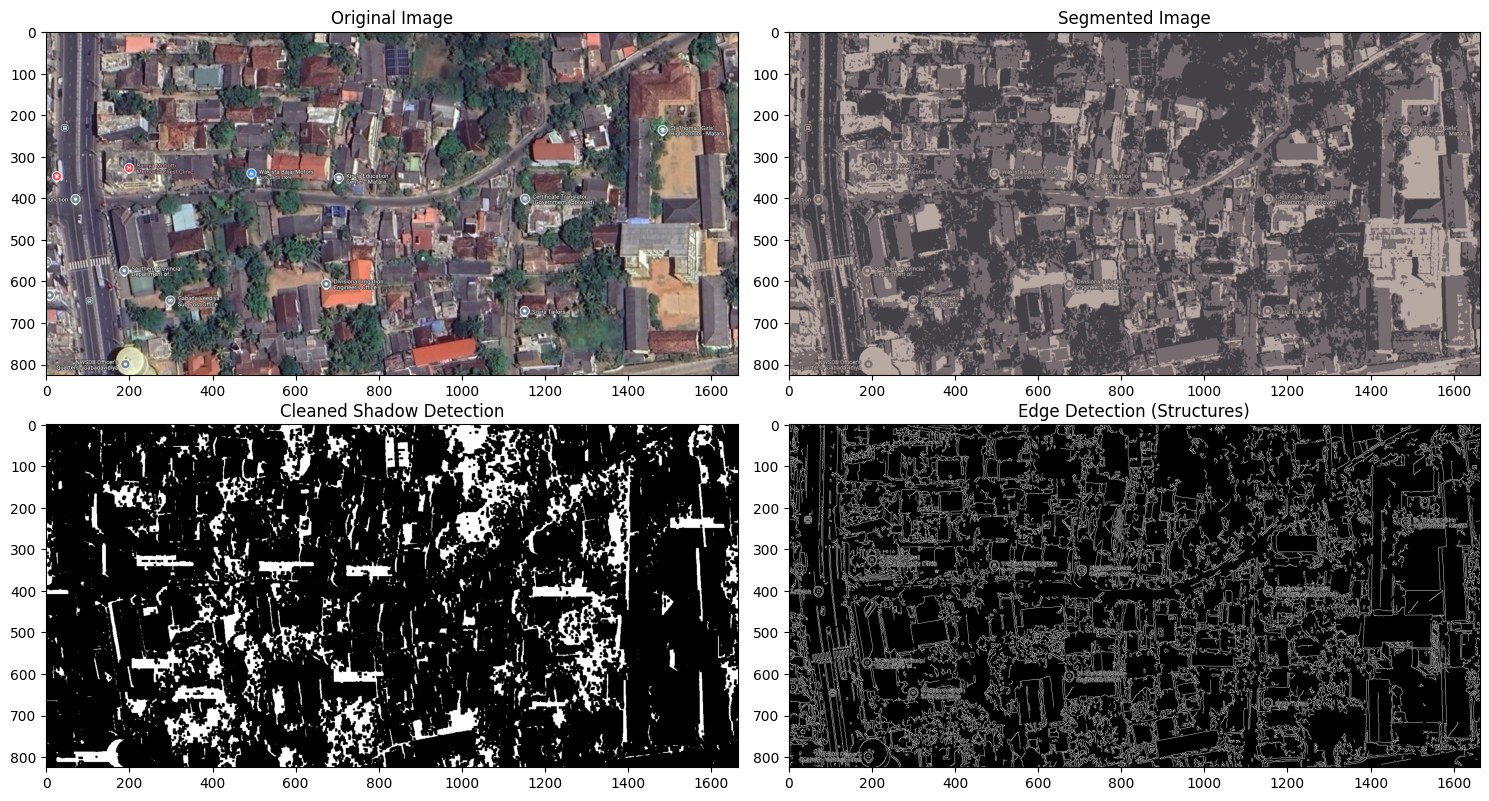

Average Brightness (Sunlight Exposure Estimation): 103.67819347319347
Solar Potential Score (Higher is Better): -34.643072552447556


In [10]:
# Analyze the solar potential of the image
analyze_solar_potential(image_path)

In [11]:
# Example usage with a local image file
image_path = 'Screenshot 2024-09-03 at 19.39.39.png' 

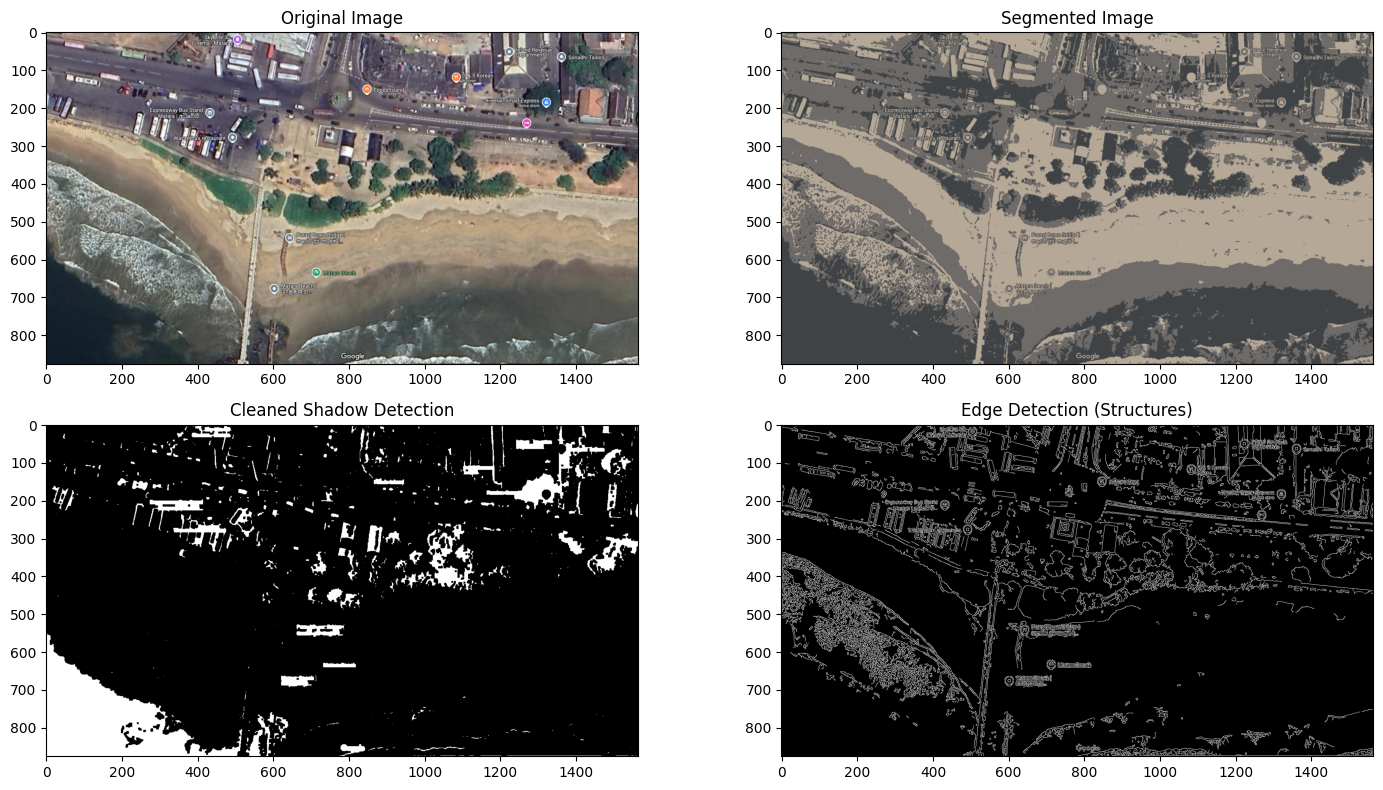

Average Brightness (Sunlight Exposure Estimation): 116.43639859159865
Solar Potential Score (Higher is Better): -18.958457415128052


In [12]:
# Analyze the solar potential of the image
analyze_solar_potential(image_path)

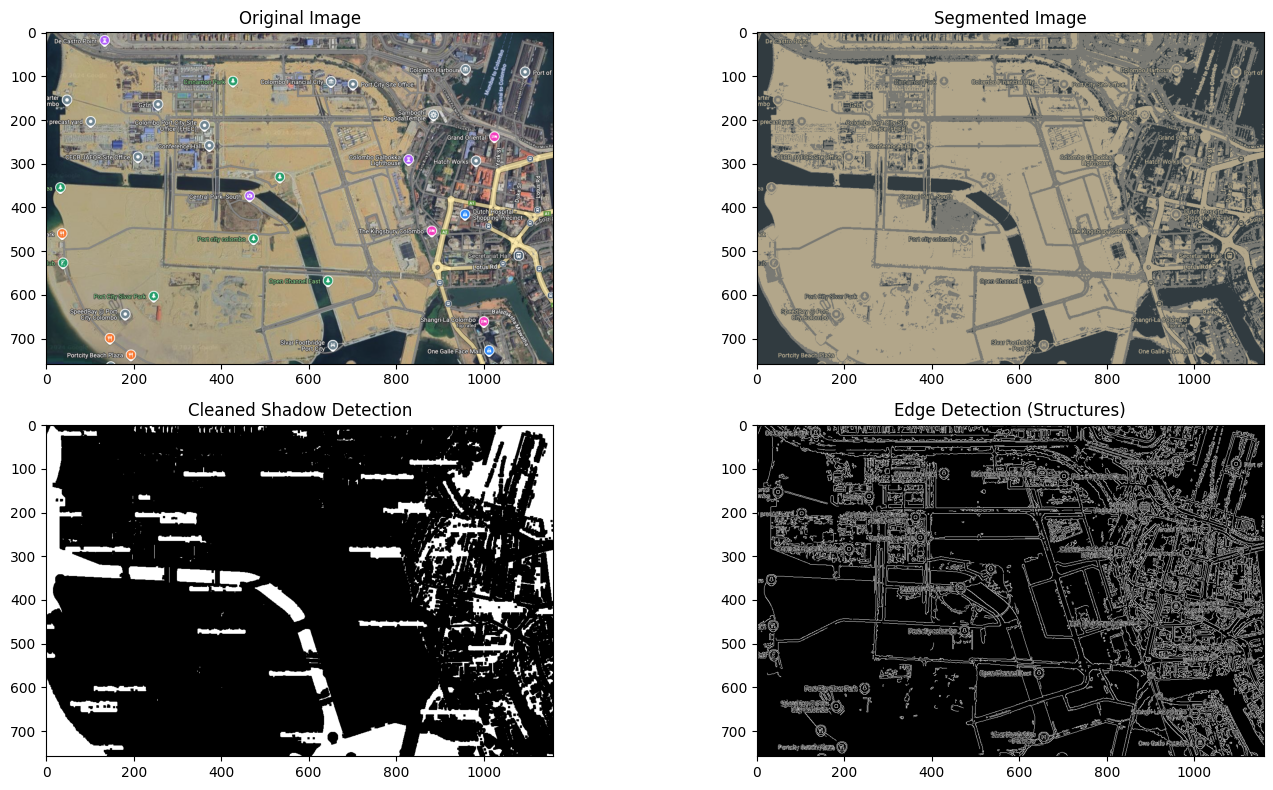

Average Brightness (Sunlight Exposure Estimation): 131.6539930397598
Solar Potential Score (Higher is Better): -35.02769879901738


In [13]:
# Example usage with a local image file
image_path = '/Users/chalana/Desktop/solar panels locations/Screenshot 2024-09-06 at 11.03.18.png' 
# Analyze the solar potential of the image
analyze_solar_potential(image_path)

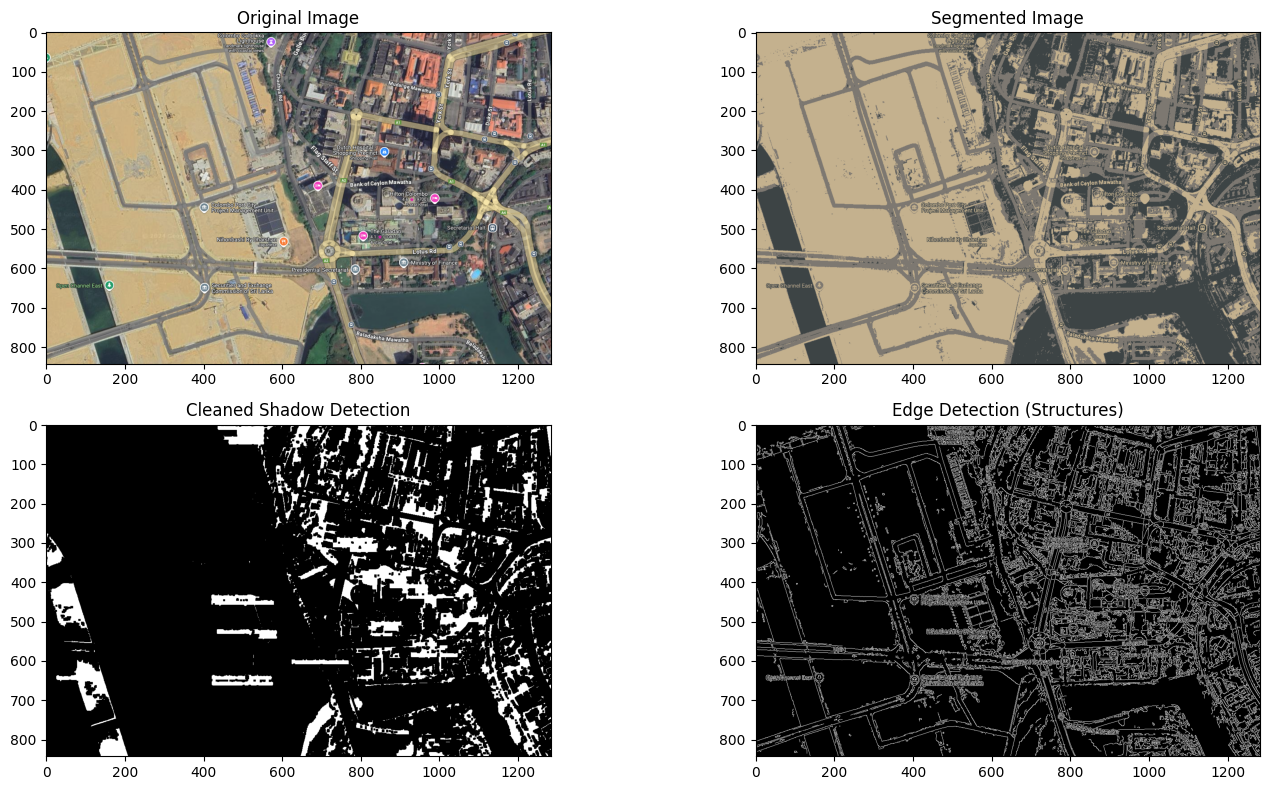

Average Brightness (Sunlight Exposure Estimation): 134.9311028699972
Solar Potential Score (Higher is Better): -25.449804866818482


In [14]:
# Example usage with a local image file
image_path = 'Screenshot 2024-09-06 at 11.03.37.png' 
# Analyze the solar potential of the image
analyze_solar_potential(image_path)